In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

from sklearn.linear_model import LinearRegression

from config.constants import GIT_DIRECTORY, SCORES, ID_COL

# load scores + features
scores = pd.read_csv(os.path.join(GIT_DIRECTORY, "data/language_scores_all_subjects.csv"))
features = pd.read_csv(os.path.join(GIT_DIRECTORY, "results/features/cleaned/cookieTheft_cleaned.csv"))

# merge on Subject_ID so we have features + scores in one df
df = features.merge(
    scores[[ID_COL] + SCORES],
    on=ID_COL,
    how="inner",
)

# predictors = all feature columns (no scores, no ID)
predictors = [c for c in df.columns if c not in SCORES + [ID_COL]]

In [9]:
def check_regression_assumptions_notebook(model, X, y):
    """
    Check regression assumptions: linearity, homoscedasticity and normality of residuals.
    """
    # predictions & residuals
    y = np.asarray(y).ravel()
    y_pred = np.asarray(model.predict(X)).ravel()
    residuals = y - y_pred

    # Residuals vs Fitted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, residuals, alpha=0.7, edgecolor="k")
    plt.axhline(0, color="gray", linestyle="--")
    plt.xlabel("Fitted values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs. Fitted")
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(6, 4))
    plt.hist(residuals, bins=30, edgecolor="black", alpha=0.75)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residual")
    plt.ylabel("Frequency")
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 4))
    sm.qqplot(residuals, line="45", fit=True)
    plt.title("Q-Q Plot of Residuals")
    plt.show()

    # Durbin-Watson
    dw_stat = durbin_watson(residuals)
    print(f"Durbin-Watson statistic: {dw_stat:.4f}")



checking assumptions for PictureNamingScore


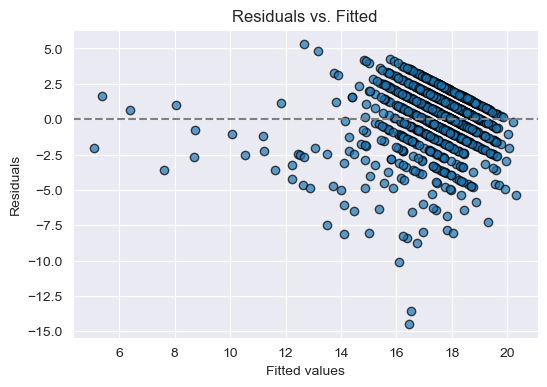

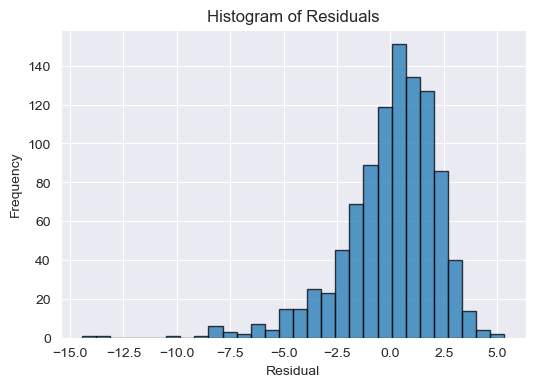

<Figure size 600x400 with 0 Axes>

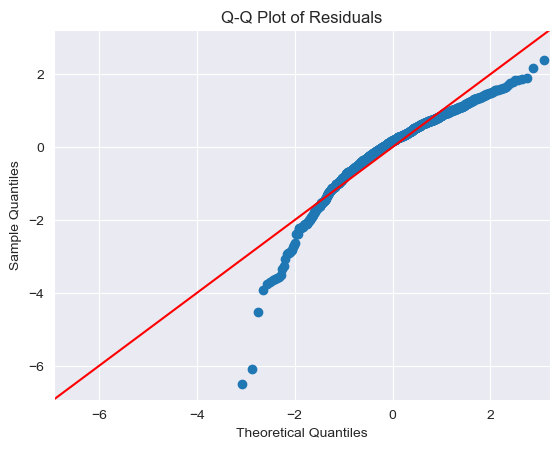

Durbin-Watson statistic: 1.8726

checking assumptions for SemanticFluencyScore


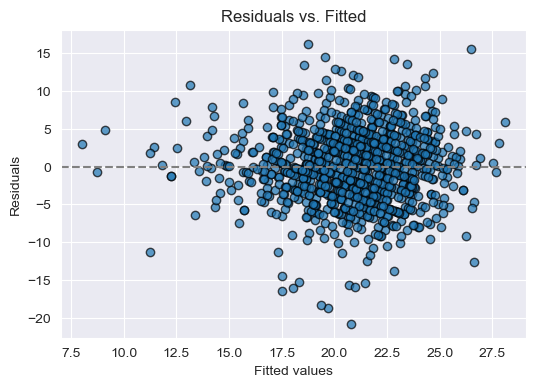

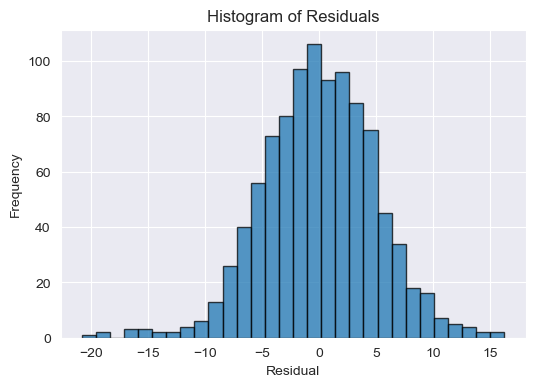

<Figure size 600x400 with 0 Axes>

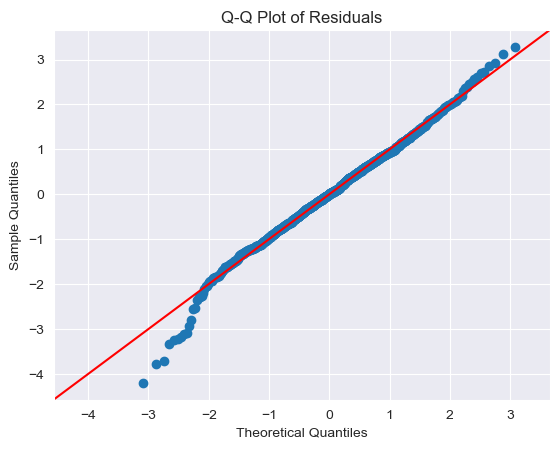

Durbin-Watson statistic: 1.8815

checking assumptions for PhonemicFluencyScore


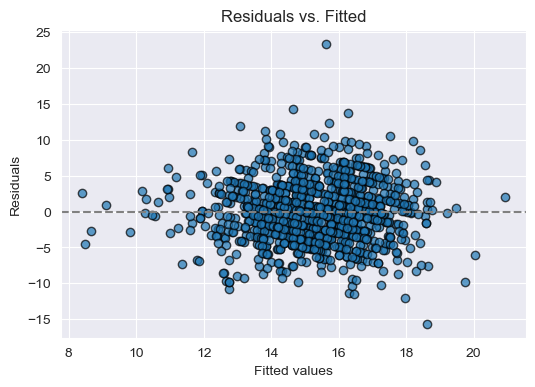

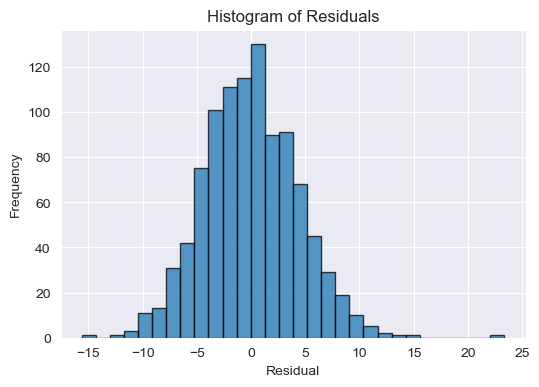

<Figure size 600x400 with 0 Axes>

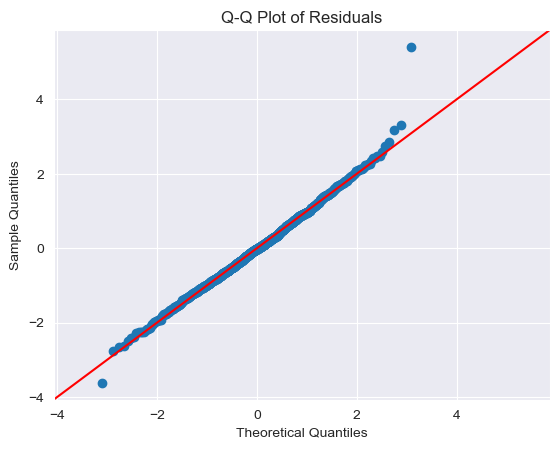

Durbin-Watson statistic: 2.0170


In [10]:
for target in SCORES:
    print(f"\nchecking assumptions for {target}")
    sub = df[predictors + [target]].dropna()
    X = sub[predictors].values
    y = sub[target].values

    model = LinearRegression()
    model.fit(X, y)

    check_regression_assumptions_notebook(model, X, y)